# Heat Flow

## Half-space Cooling Model
<img src="images/halfspace_cooling_model.png" style="width:500px;height:250px"><br>
Heat equation is as follow: <br><br>
$$ \frac{\partial^{2}T}{\partial x^{2}} + \frac{\partial^{2}T}{\partial z^{2}} = \frac{v}{\kappa}\:\frac{\partial{T}}{\partial x} $$

where $T$ is temperature and $\kappa$ is the thermal diffusivity. The first term represents the lateral diffusion of heat, the second term represents the vertical diffusion of heat, and the third term (on the right side) is the advection of heat by the motion of the plate.<br>

Away from the ridge axis ($x$ >> 0), one can show that the lateral heat diffusion is much smaller than the vertical heat diffusion. As this is a 2-dimensional problem with no heat sources so the heat equation has only diffusive and advective terms:<br><br>
$$\frac{\partial^{2}T}{\partial z^{2}} = \frac{v}{\kappa}\:\frac{\partial{T}}{\partial x} $$ 

Dropping this term simplifies the differential equation. The boundary and initial conditions are:<br>

$$T(0,t) = T_{0}$$
$$T({\infty},t) = T_{m}$$
$$T(z,0) = T_{m}$$

The inifinite half-space has constant thermal diffusivity and an initially constant temperature $T_{m}$. At times greater than zero, the surface temperature reduced to $T_{0}$. The temperature will evolve with time. Note for this problem, time also corresponds to the age of the cooling oceanic lithosphere.

The solution of the half-space cooling equation is:<br>

$$T(z,t) = (T_{m} - T_{0})\:erf\left(\frac{z}{2\sqrt{\kappa t}}\right) + T_{0}$$

where $T_{m}$ is the temperature of mantle/asthenosphere, $T_{0}$ is the surface temperature, $T_{z}$ is the temperature at depth $z$, $t$ is the age of the lithosphere, $\kappa$ is the thermal diffusivity (~$10^{-6}\: Wm^{-1}K^{-1}$)

The definition of the error function $erf(x)$:<br>

$$erf(x) = \frac{2}{\sqrt{\pi}}\int_{x}^{0} e^{-t^{2}} dt \$$

Error function table
<img src="images/erf_table.png" style="width:500px;height:500px"><br>

### Practical 3.2
Calculate the $60 Ma$ geotherm $T_{z}$ in the oceanic lithosphere for the half-space cooling model.
What is the thickness of $60Ma$ oceanic lithosphere? Use a surface temperature of $0°C$; an
asthenospheric temperature of $1300°C$; and a temperature of $1150°C$ for the base of the lithosphere.
Assume a thermal conductivity $\kappa$ of $10^{-6}\: Wm^{-1}K^{-1}$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Convert years to seconds
t = 60 * 10**(6) * 365.25 * 24 * 60 * 60
T_m = 1300
T_0 = 0
T_z = 1150
k = 10**(-6)

def erf(T_m, T_0, T_z):
    err_f = (T_z - T_0) / (T_m - T_0)
    return err_f

# compare err_f with table
# you should obtain 1.115

z = 1.115 * 2 * math.sqrt(k * t)/1000
print("The thickness of the oceanic lithosphere is", round(z,2), "km")

The thickness of the oceanic lithosphere is 97.04 km


# Water Depth and Plate Models
## Isotasy Model
The model assumes that the lithosphere is a simply cooled asthenosphere.
<img src="images/isostasy_model.png" style="width:500px;height:250px"><br>
The two columns shown are isostatically balanced. They have the same mass per unit area, because the older column contains water to offset the added weight of dense lithospheric rock.
## Half-space Model
We can now use a heat conduction formulation and isostatic balancing and calculate the masses per unit area in these two columns to derive a formula for the depth of the ocean floor $w$ as a function of age $t$ . The solution will be applicable to columns of all ages.

Depth ($w$) vs. age ($t$) for the ocean floor:<br><br>
$$w = w_{0} + \frac{2 {\rho}_{a}\:{\alpha}_{v}\:T_{a}}{{\rho}_{a}\:{\rho}_{w}}\sqrt{\frac{{\kappa}t}{\pi}}$$

By using the following values,<br><br>
${\rho}_{w} = 1000\:kg\:m^{-3}$ (density of water)<br>
${\rho}_{a} = 3300\:kg\:m^{-3}$ (density of top asthenosphere)<br>
${\alpha} = 3 \times 10^{-5}\:°C^{-1}$ (coefficient of thermal expansion)<br>
${\kappa} = 10^{-6}\:m^{2}\:s^{-1}$ (thermal conductivity)<br>
$T_{a} = 1300\:°C$ (temperature at the base of the plate)<br>
$w_{0} = 2500\:m$ (depth of ridge)<br>

we can obtain a simplified formula as given by (Parson and Sclater, 1997):<br><br>
$$w = 2500 + 350\sqrt{t}$$<br>

This formula satisties observational constrains quite well for ocean crust younger than 80 ma. Note: $w$ = depth of ocean floor = water depth

<img src="images/halfspace_model.png" style="width:310px;height:300px"><br>

The ocean depth with age curve "flattens" for ages older than 80-100 Ma, i.e. the observed subsidence is smaller than expected from the half-space cooling model. One possibility to explain the observed "flattening“ is that by some means there is more heat beneath old lithosphere than predicted by the half-space cooling model.

Possible mechanisms include:
1. small scale convection,
2. radioactive heat decay,
3. phase changes, and
4. mantle plumes.

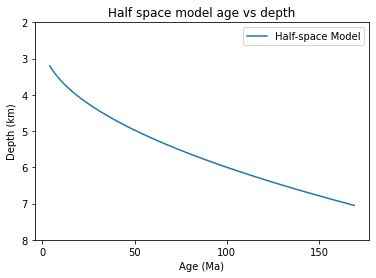

In [ ]:
# Half space model age vs depth plot

x = np.arange(4, 170, 1)
y = (2500+350*np.sqrt(x))/1000

plt.plot(x, y, label='Half-space Model')
plt.yticks(range(2, 9))
plt.xticks(range(0, 200, 50))
plt.gca().invert_yaxis()
plt.title("Half space model age vs depth")
plt.xlabel('Age (Ma)')
plt.ylabel('Depth (km)')
plt.legend()
plt.show()


## Stein and Stein Plate Model
A popular alternative to the half-space cooling model is the so-called plate (PSM) model first proposed by Parsons and Sclater (1977) and refined to GDH1 model by Stein & Stein (1992):

<img src="images/thermal_model.png" style="width:600px;height:200px"><br>

For the plate model beyond a critical age the lithosphere is assumed to be a constant thickness $L$, with a constant temperature $T_{a}$ at its base. The proposed mechanism for the required supply of heat is small-scale convection in a lower thermal boundary layer.

The subsidence is obtained by isostatic balancing:

$$w = w_{final} - T_{m}L\frac{{\rho}_{a}}{{\rho}_{a}-{\rho}_{w}}4{\alpha}\:\sum_{n=1,3,5,...} \frac{1}{n^{2}{\pi}^{2}}exp\left(-\frac{n^{2}{\pi}^{2}{\kappa}t}{L^{2}}\right)$$<br>
$$= 6400 - 3200\:exp^{-(t/62.8)}\:\:\:for\: t > 20 ma$$ <br>
where $w_{final}$ is the equilibrium depth (Parsons and Sclater, 1977).

<img src="images/sns_model.png" style="width:310px;height:300px"><br>
Note: at age 0, the depth is 2.6 km.

In [ ]:
# Half space and plate model age vs depth plot

x = np.arange(4, 170, 1)
y = (2500+350*np.sqrt(x))/1000
x2 = np.arange(20, 170, 1)
y2 = (6400 - 3200 * np.exp(-x2/62.8))/1000

plt.plot(x2, y2, label='Plate Model')
plt.plot(x, y, label='Half-space Model')
plt.yticks(range(2, 9))
plt.xticks(range(0, 200, 50))
plt.gca().invert_yaxis()
plt.title("Half space model age vs depth")
plt.xlabel('Age (Ma)')
plt.ylabel('Depth (km)')
plt.legend()
plt.show()

### Practical 3.3
(a) Using the Stein and Stein half space model, calculate the difference in depth of the seabed at the intersection of a mid-ocean ridge and a transform fault. Assume that the mid-ocean ridge is spreading at 4 cm yr -1 (full rate) and that the ridge is offset 300 km by the transform fault.

In [ ]:
def halfspace_model(age):
    depth = (2500+350*np.sqrt(age))/1000
    return depth #in km

age_ridge = 0
age_offset = 300 * 1000 * 100 / (4 / 2) / 10**6 #age in Ma

depth_difference = np.abs(halfspace_model(age_ridge) - halfspace_model(age_offset))

print("The difference in depth of the seabed at the intersection of a mid-ocean ridge and a transform fault is", 
      round(depth_difference, 2), "km." )

(b) Calculate the difference in depth on either side of the same fault at 1000/1300 km from the ridge
axis.

In [ ]:
def plate_model(age):
    depth = (5.65 - 2.47 * np.exp(-age/36))
#   depth = (6400 - 3200 * np.exp(-age/62.8))/1000
    return depth #in km

age_1000 = 1000 * 1000 * 100 / (4 / 2) / 10**6
age_1300 = 1300 * 1000 * 100 / (4 / 2) / 10**6

depth_difference = np.abs(plate_model(age_1000) - plate_model(age_1300))

print("The difference in depth on either side of the same fault at 1000/1300 km from the ridge axis is", 
      round(depth_difference, 2), "km." )

## Plate models contraints
We still can’t discriminate between the different plate models because:
1. The quality of heat flow data varies substantially
2. The sediment thickness is often not known well enough to be corrected for
3. The oceanic crustal thickness is not known well enough in areas where it deviates from normal ocean crust (i.e. oceanic plateaus)
4. Different ocean basins may have subsided from different ridge elevations at zero age
5. The thermal effects of hotspots are difficult to constrain, as they varying both in time and space

### Reference
2022 notes and practical from Lecture 3 of the module ESE 60028 Tectonics of the Ocean